## Normality

![Normal dist.png](<attachment:Normal dist.png>)
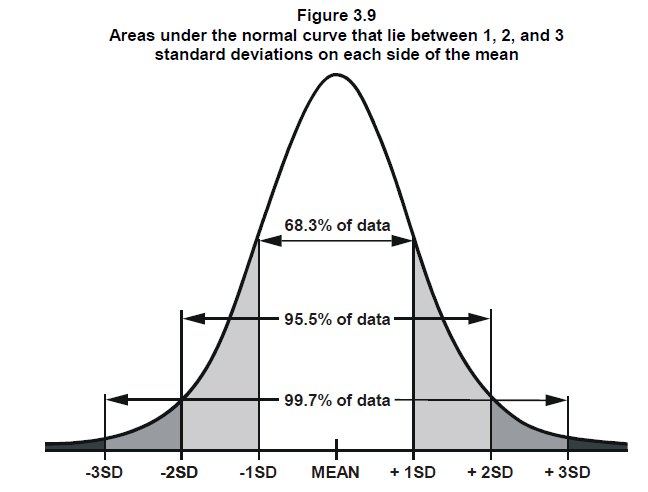

In [1]:
from scipy import stats
import pandas as pd
from utils import setup_project_root

setup_project_root()

life = pd.read_csv(r"data\Life_Expectancy_Data.csv")
life

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


<Axes: xlabel=' BMI ', ylabel='Count'>

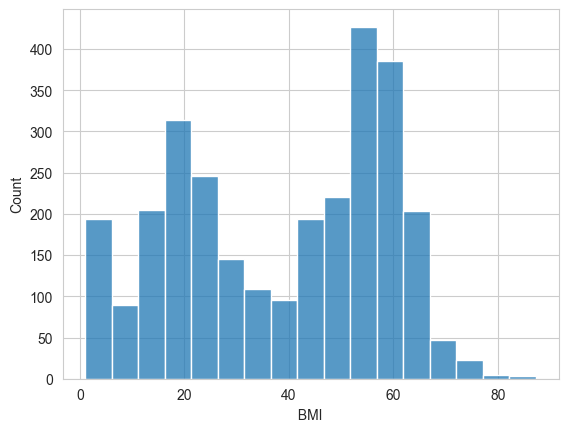

In [2]:
import seaborn as sns
sns.histplot(life[' BMI '])

In [3]:
life.dropna(how='any', inplace=True)
test_stat, critical_vals, signif_level = stats.anderson(life[' BMI '])

list(zip([f'Significant at level: {signif_level[i]}%' if 0.5 > critical_vals[i]
          else f'Not siginificant at level: {signif_level[i]}%'
          for i in range(len(critical_vals))
          ],
         critical_vals, signif_level))

[('Not siginificant at level: 15.0%', np.float64(0.575), np.float64(15.0)),
 ('Not siginificant at level: 10.0%', np.float64(0.654), np.float64(10.0)),
 ('Not siginificant at level: 5.0%', np.float64(0.785), np.float64(5.0)),
 ('Not siginificant at level: 2.5%', np.float64(0.916), np.float64(2.5)),
 ('Not siginificant at level: 1.0%', np.float64(1.089), np.float64(1.0))]

## Normalising Data

In [4]:
# Central limit theorem
# Rare to reject a dataset to for abnormality

<Axes: xlabel=' BMI ', ylabel='Count'>

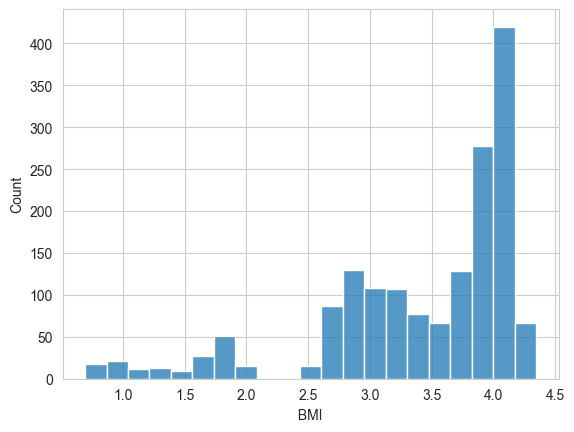

In [5]:
import numpy as np
sns.histplot(np.log(life[' BMI ']))

In [6]:
life.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [7]:
life

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [8]:
logged_bmi = np.log(life[' BMI '])
stats.pearsonr(life['Measles '], life[' BMI '])
stats.pearsonr(life['Measles '], logged_bmi)



PearsonRResult(statistic=np.float64(-0.10699962127262404), pvalue=np.float64(1.3353033478379403e-05))

## ANOVA

In [9]:
life['Country'].value_counts()

Country
Afghanistan          16
Albania              16
Belgium              15
Austria              15
Armenia              15
                     ..
Namibia               5
Netherlands           4
Sweden                4
Haiti                 2
Equatorial Guinea     1
Name: count, Length: 133, dtype: int64

In [10]:
life.loc[life['Country']=='Belgium']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
241,Belgium,2014,Developed,89.0,76.0,0,12.60,7163.348923,98.0,70,...,99.0,1.59,99.0,0.1,47439.39684,112957.0,1.0,1.0,0.890,16.3
242,Belgium,2013,Developed,87.0,77.0,0,11.77,702.359357,98.0,39,...,99.0,1.57,99.0,0.1,4651.38647,11182817.0,1.0,0.9,0.889,16.3
243,Belgium,2012,Developed,83.0,78.0,0,10.08,664.473898,98.0,109,...,99.0,1.54,99.0,0.1,4474.57170,11128246.0,0.9,0.9,0.886,16.2
244,Belgium,2011,Developed,83.0,8.0,0,10.11,713.529735,97.0,576,...,98.0,1.42,98.0,0.1,4772.77415,1147744.0,0.9,0.9,0.884,16.1
245,Belgium,2010,Developed,80.0,81.0,0,10.22,665.735612,97.0,40,...,98.0,1.17,98.0,0.1,4438.23741,1895586.0,0.9,0.9,0.878,15.9
246,Belgium,2009,Developed,79.8,85.0,0,10.05,671.937657,97.0,33,...,98.0,1.39,98.0,0.1,4488.56150,1796493.0,0.9,0.9,0.876,15.8
247,Belgium,2008,Developed,79.5,87.0,0,10.47,7191.051507,98.0,98,...,99.0,9.60,99.0,0.1,48424.58927,179973.0,0.8,0.8,0.874,15.8
248,Belgium,2007,Developed,79.5,86.0,0,10.25,640.356092,94.0,64,...,99.0,9.25,98.0,0.1,4443.83131,16257.0,0.8,0.8,0.871,15.8
249,Belgium,2006,Developed,79.4,85.0,0,10.98,5579.199083,94.0,15,...,99.0,9.17,98.0,0.1,38852.36130,1547958.0,0.8,0.8,0.865,15.7
250,Belgium,2005,Developed,78.9,89.0,0,12.27,5068.214488,77.0,26,...,97.0,9.24,97.0,0.1,36967.28292,1478617.0,0.8,0.8,0.861,15.7


In [11]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('Alcohol ~ C(Country)', data=life.loc[life['Country'].isin(['Belgium', 'France'])].reset_index()).fit()

table = sm.stats.anova_lm(model, typ=2)

table

,sum_sq,df,F,PR(>F)
C(Country),13.912830,1.0,17.449879,0.000261
Residual,22.324467,28.0,NaN,NaN


## Levene's Test for equal variance

Are groups different?

In [12]:
life

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [13]:
life['Life expectancy ']

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 1649, dtype: float64

In [14]:
lev_stat, pvalue = stats.levene(life.loc[life['Status']=='Developing']['Life expectancy '], 
                                life.loc[life['Status']=='Developed']['Life expectancy '])

lev_stat

np.float64(90.66286235515665)

In [15]:
lev_stat, pvalue = stats.levene(life['Country'], life['Alcohol'])

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## VIF

- Variance Inflation Factor
- VIF = 1 / 1 - R**2
- Can test for multi-collinearity
- Useful for preprocessing before the model is trained.
- The model can overemphasise the variables that are highly related.

In [16]:
r = 0.94
r2 = (r)**2
vif = 1/ (1-r2)
vif

8.591065292096216

In [17]:
# is VIF is less than ~ 2, Then all okay.
# VIF ~ 5 then caution to be had
# VIF >= 10 this is unacceptable

## Power

How well can your model pickup the effect

In [18]:
from statsmodels.stats import power

tt_power = power.TTestIndPower()

likelihood = tt_power.power(effect_size=0.1, nobs1=10000, alpha=0.05)
likelihood

np.float64(0.9999998395708914)

In [21]:
# t-distributed stochastic neighbour embedding
# t-SNE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
soliders = pd.read_excel(r"data\ansur.xlsx")

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [23]:
# too many variables is bad, look into this.

In [ ]:
num